ARCH : Autoregressive Conditional Heteroskedasticity Model


GARCH : Generalized AutoRegressive Conditional Heteroskedasticity


Past values to measure variance which is conditional to the variance of past periods.

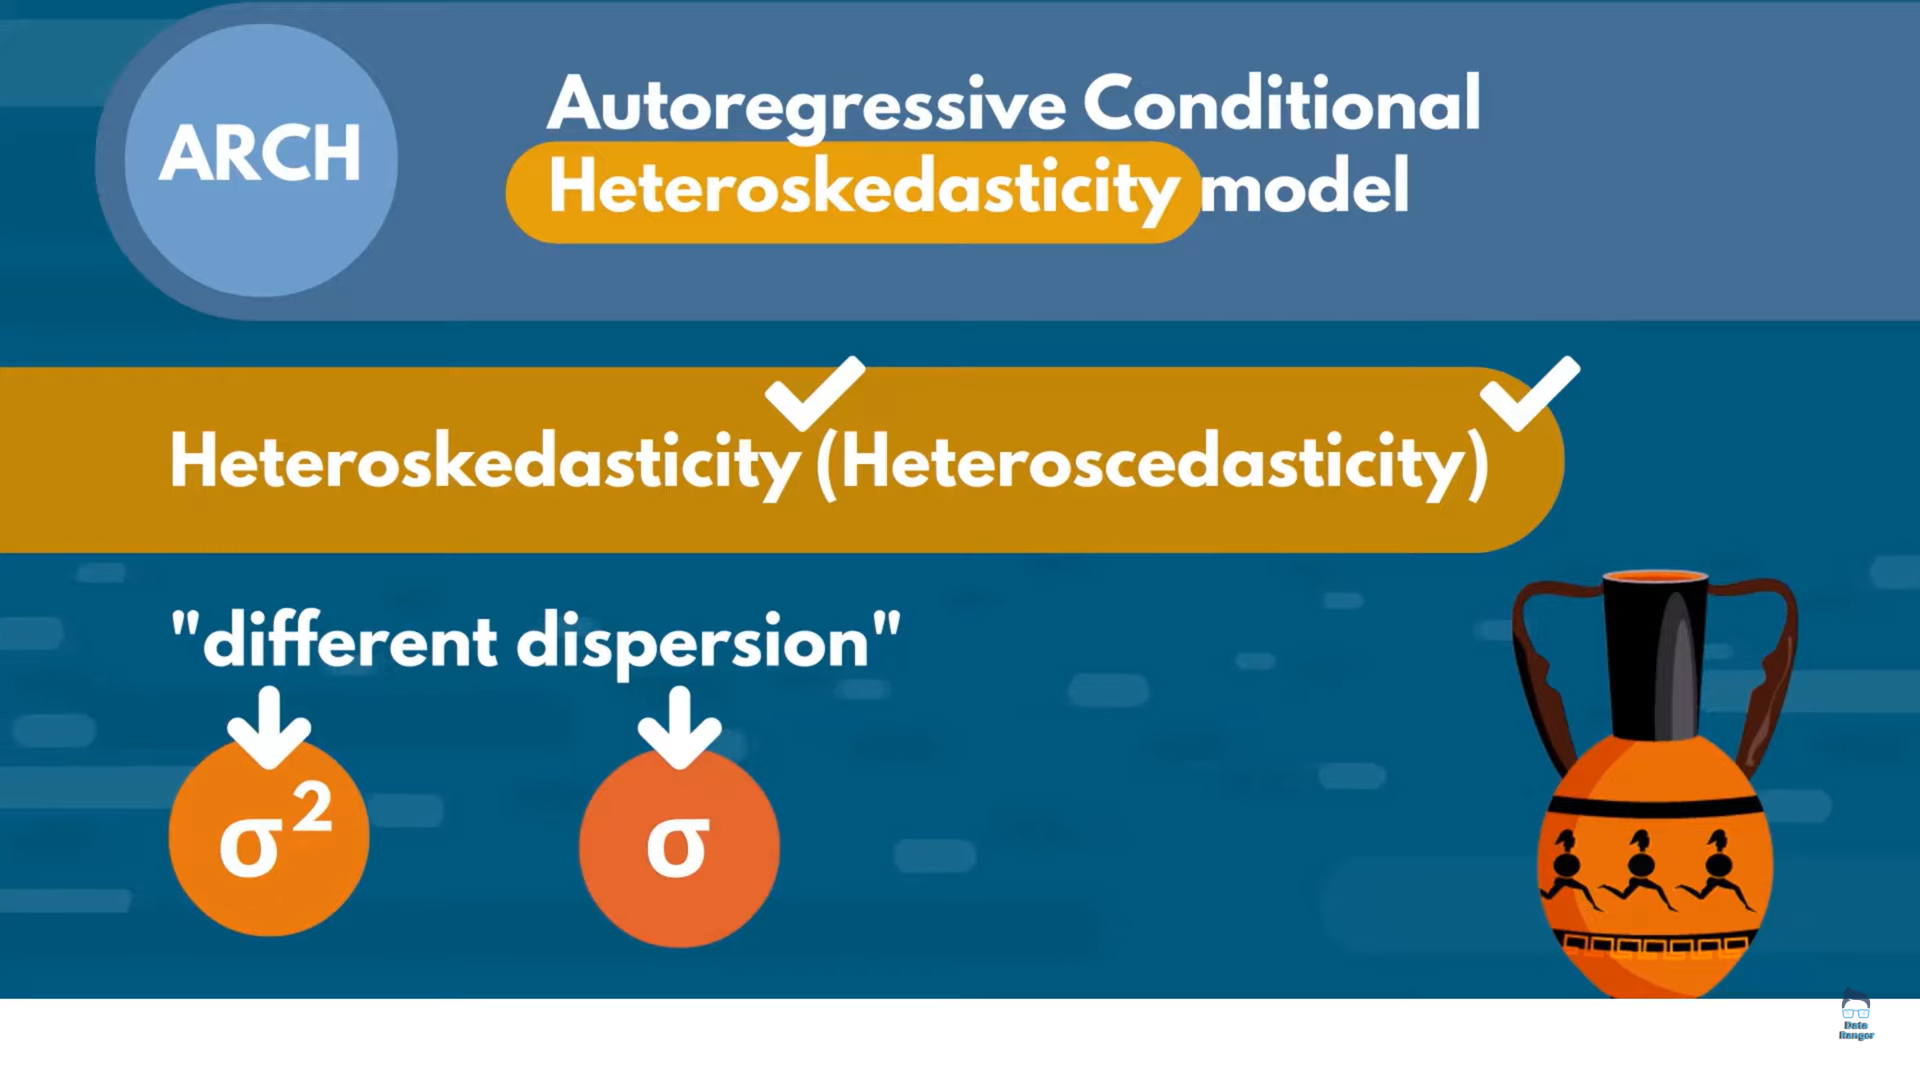

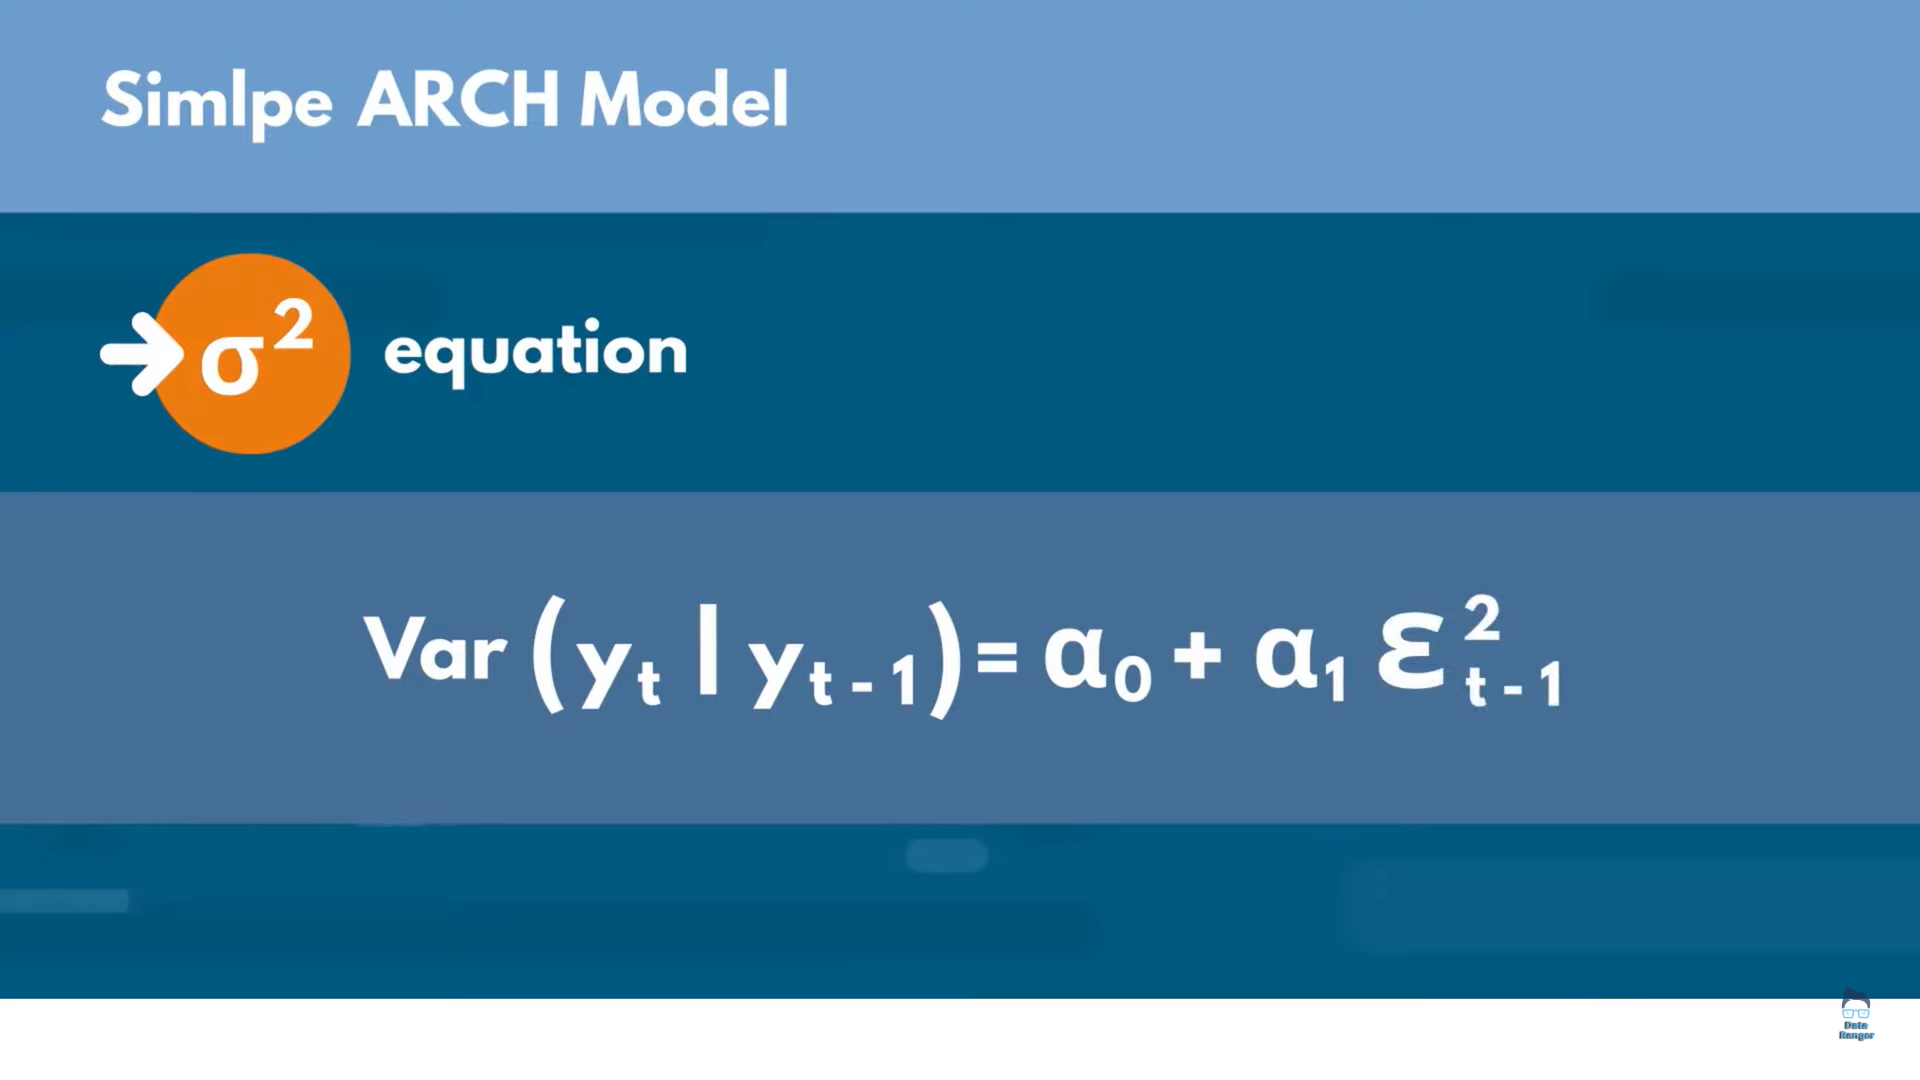

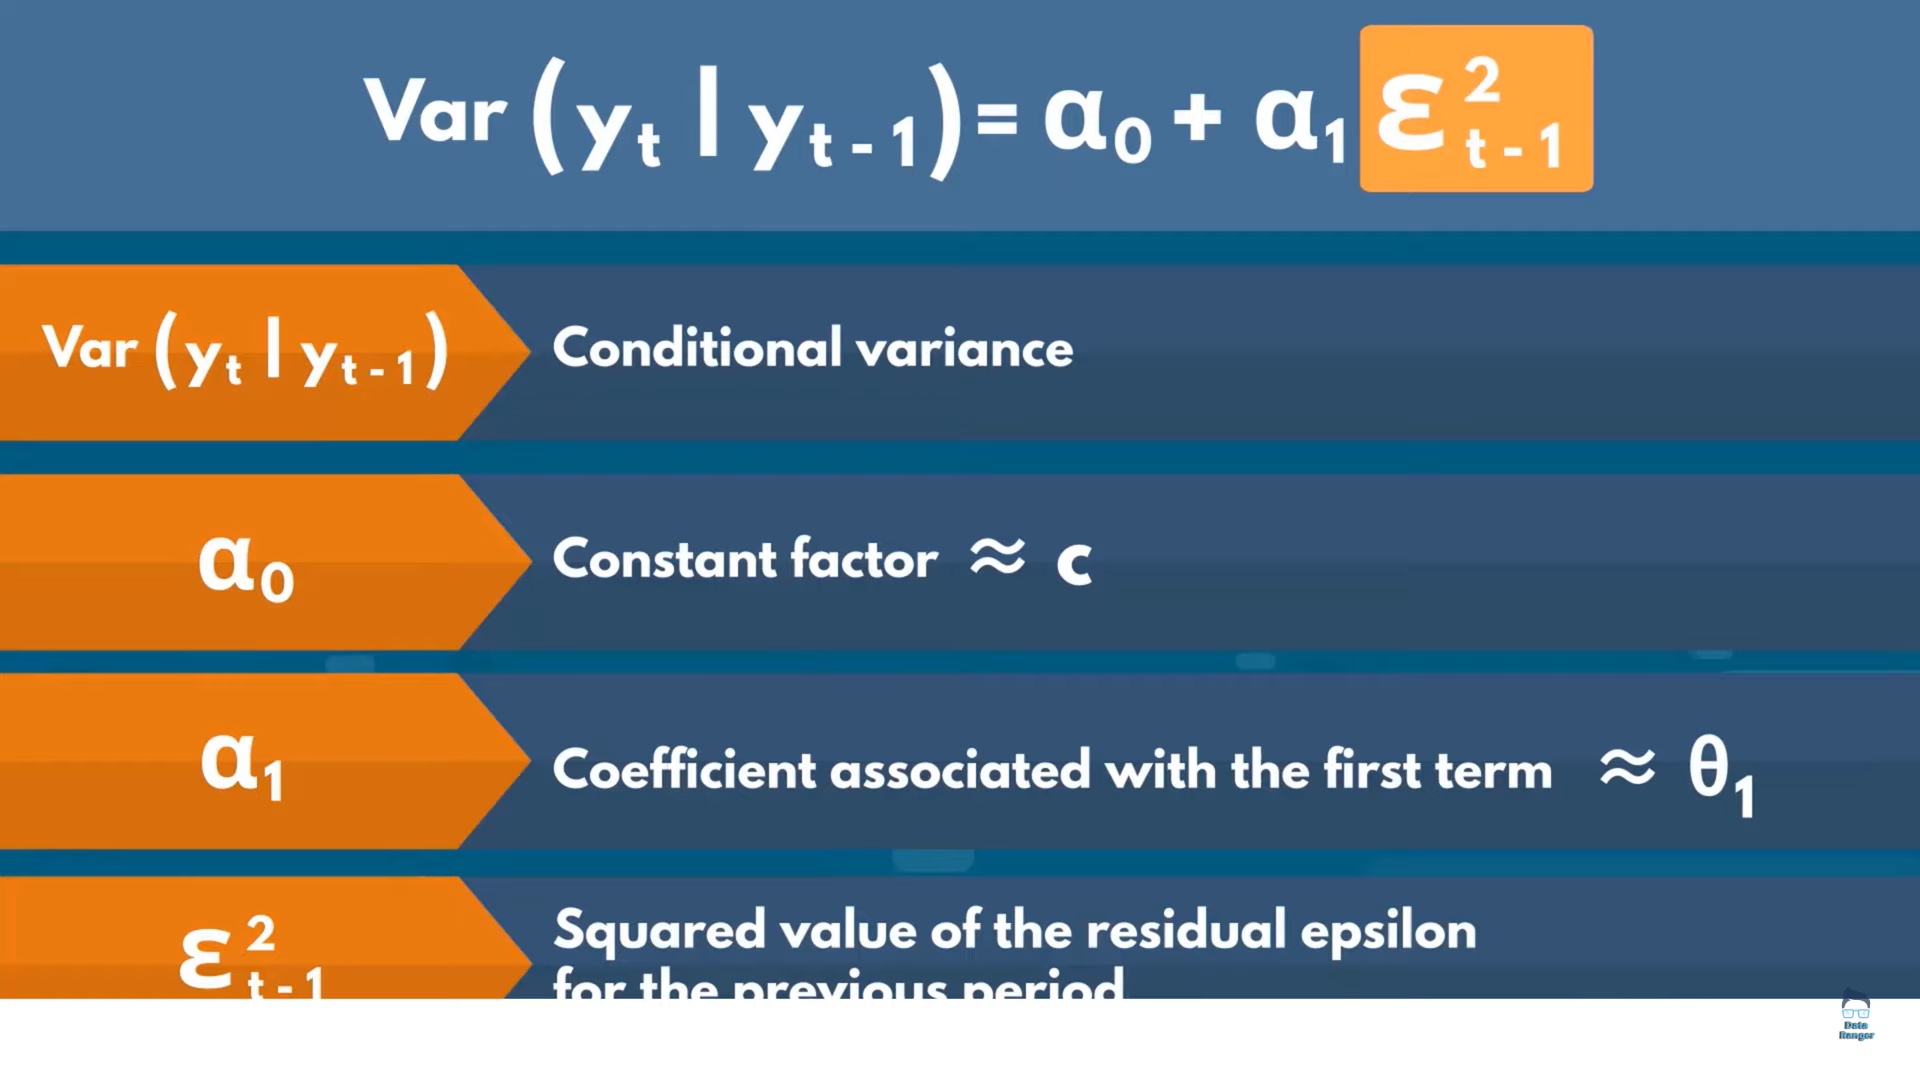

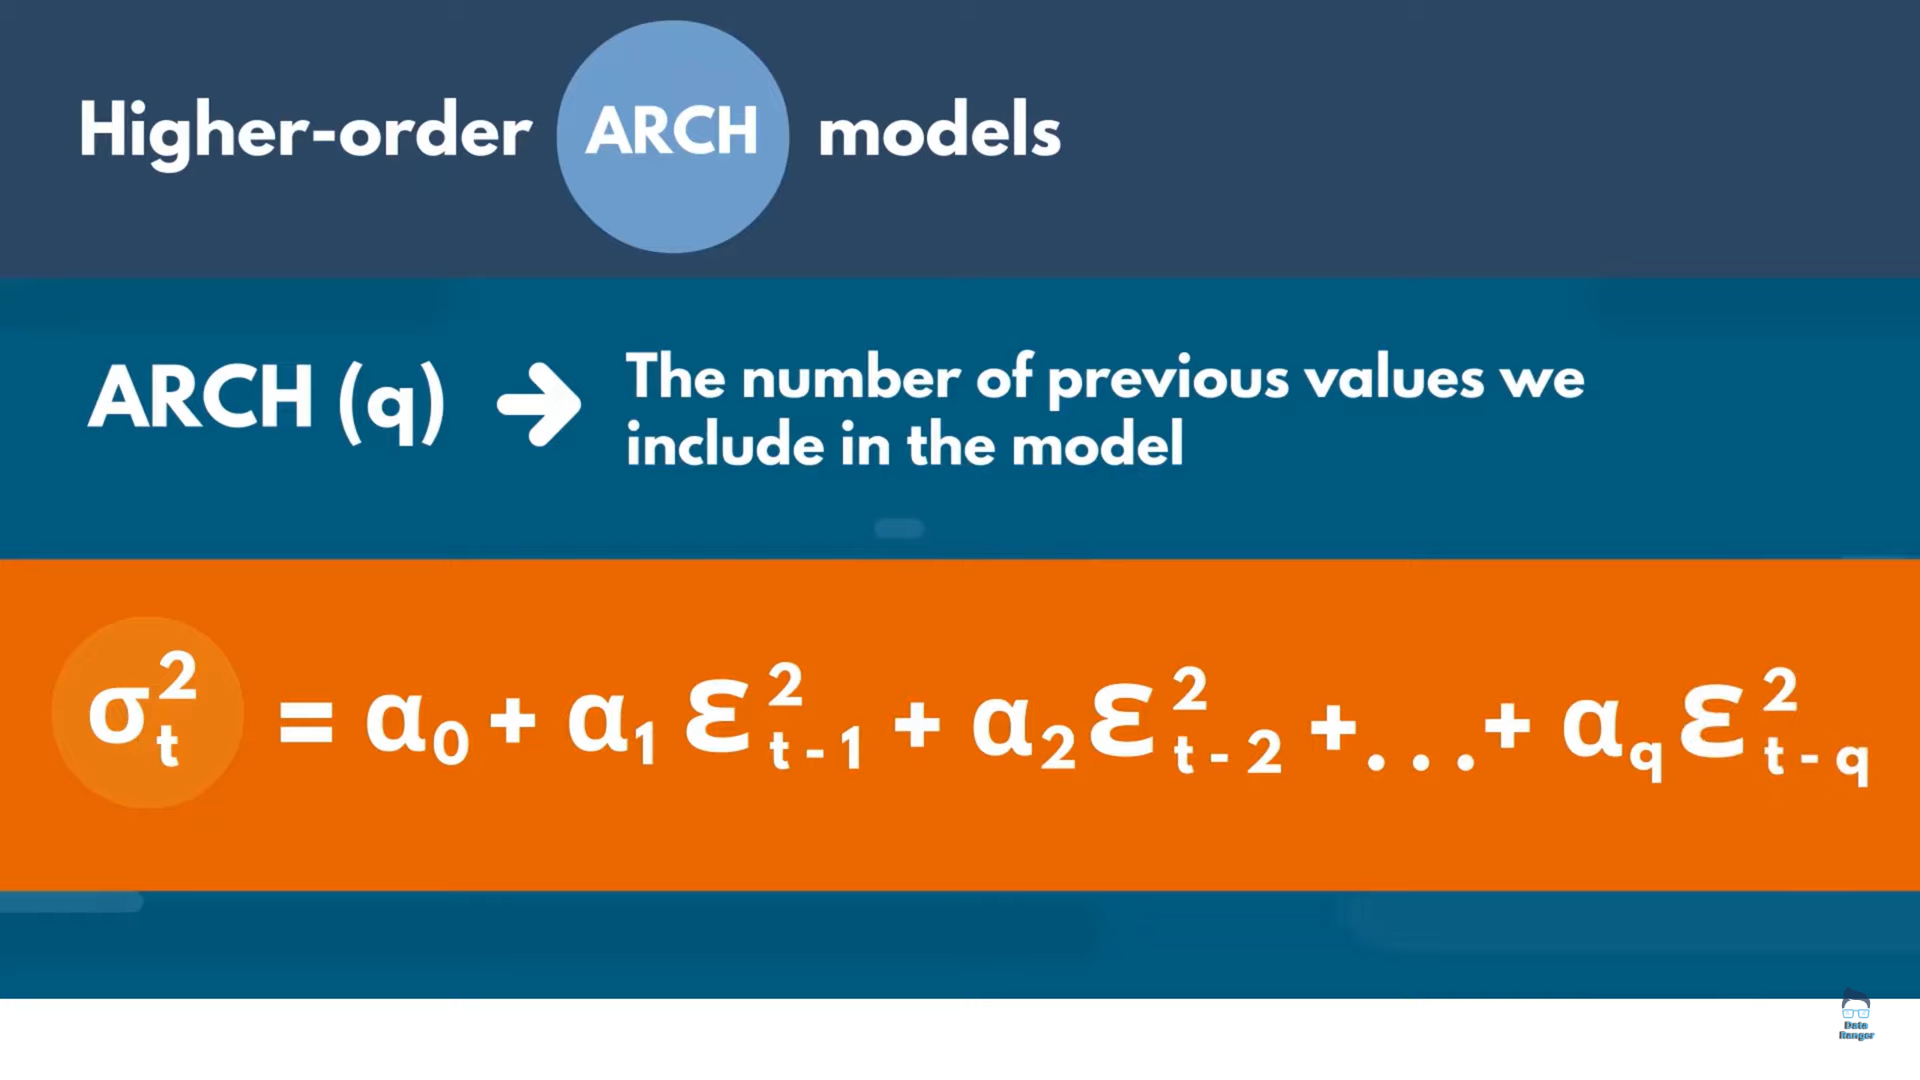

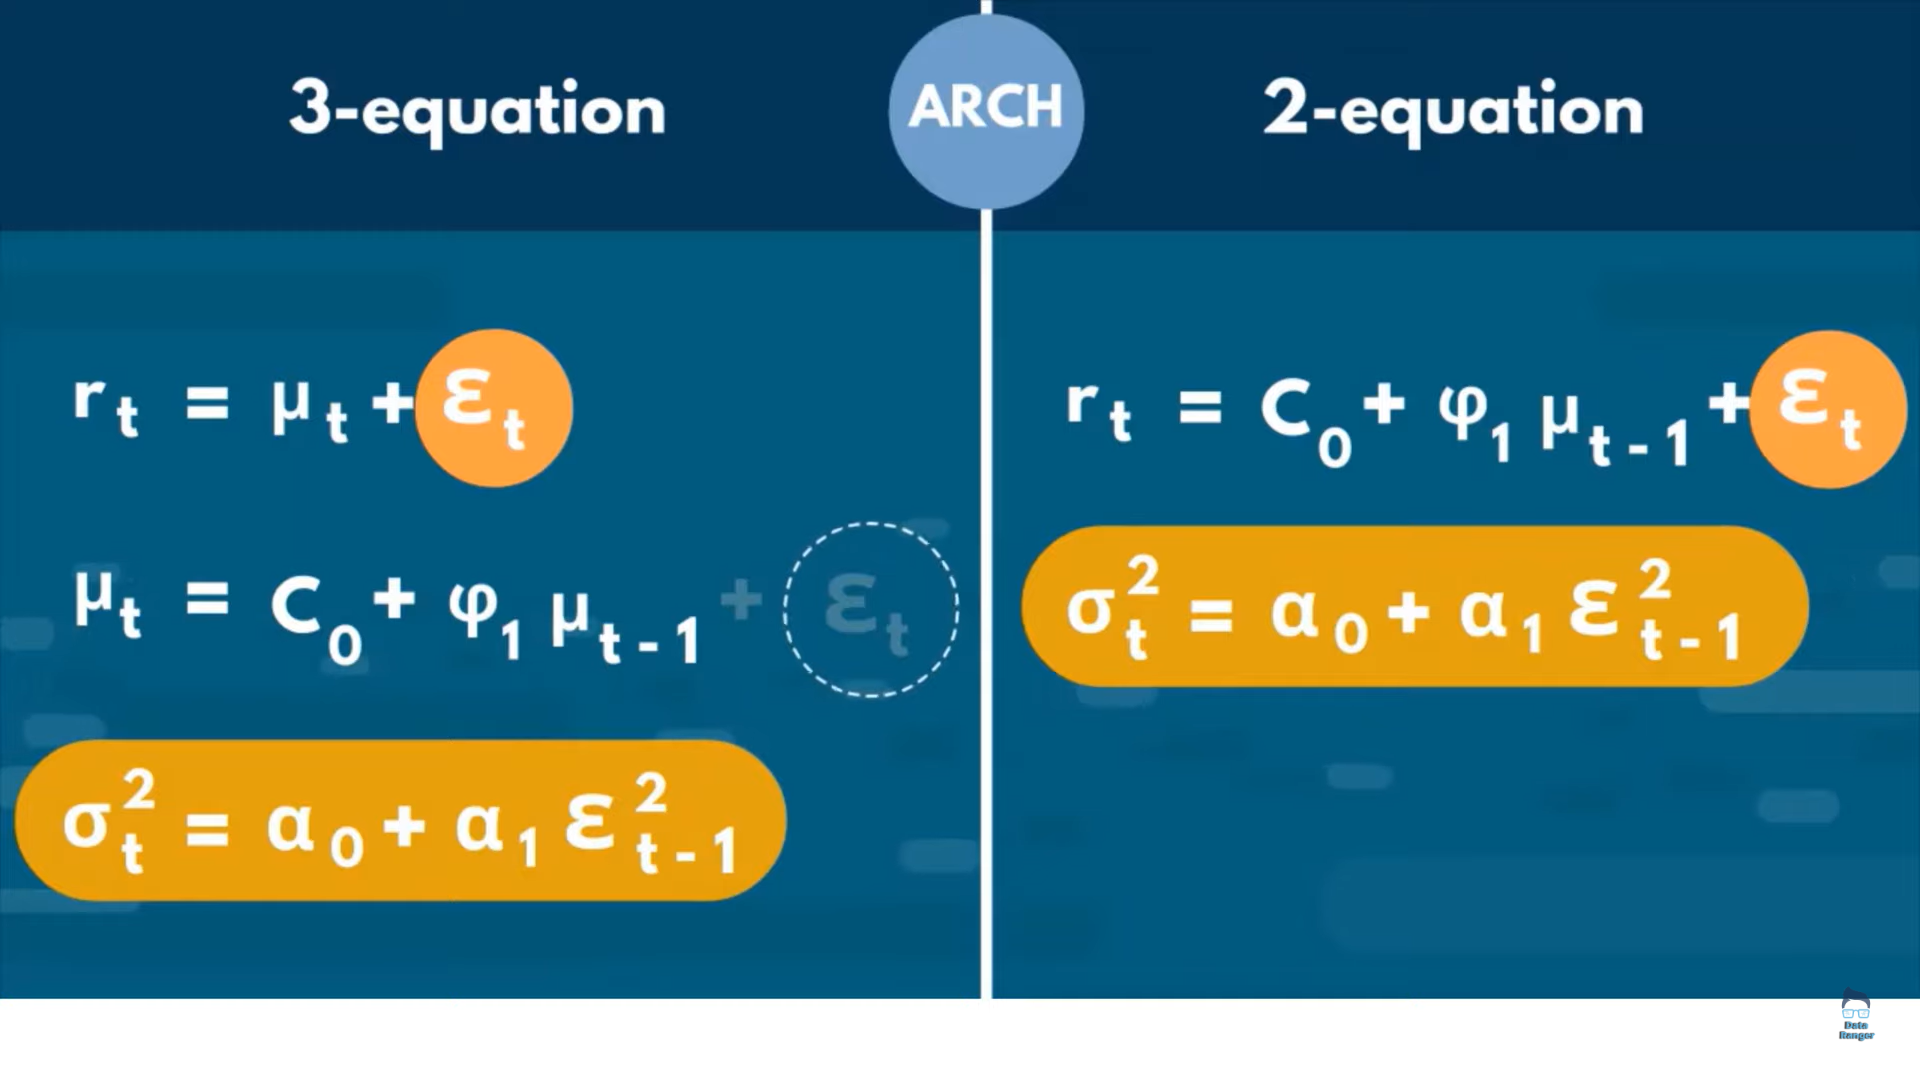

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("Book1.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq ('b')
df_comp = df_comp.fillna(method= 'ffill')

In [ ]:
df_comp['market_value'] = df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_test = df_comp.iloc[:size], df_comp.iloc[size:]

Creating Returns

In [ ]:
df_comp['returns'] = df_comp.market_value.pct_change(1)*100

Creating Squared Returns

In [ ]:
df_comp['sq_returns'] = df_comp.returns.mul(df_comp.returns)

Returns Vs Squared Returns

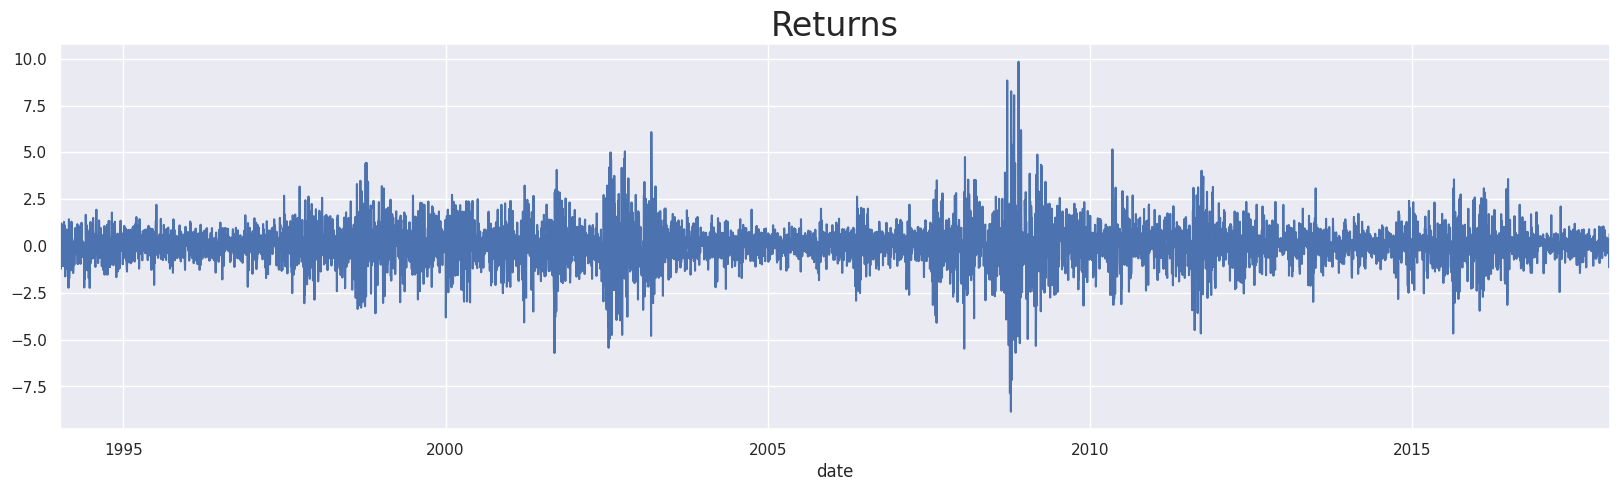

In [ ]:
df_comp.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

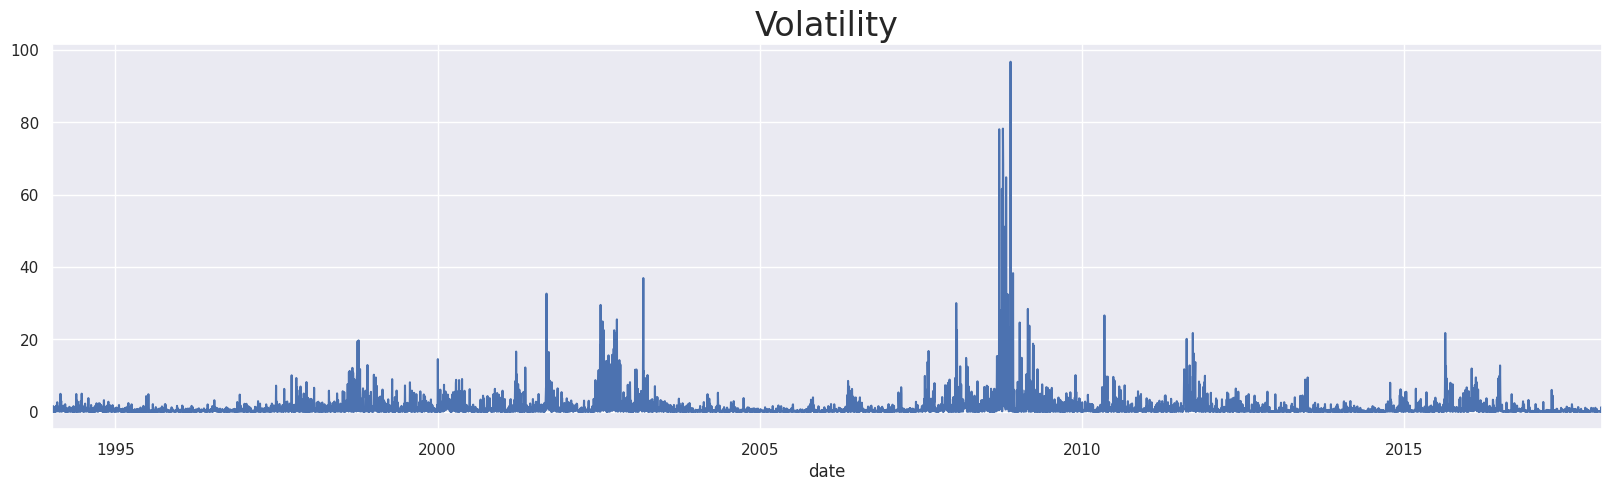

In [ ]:
df_comp.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

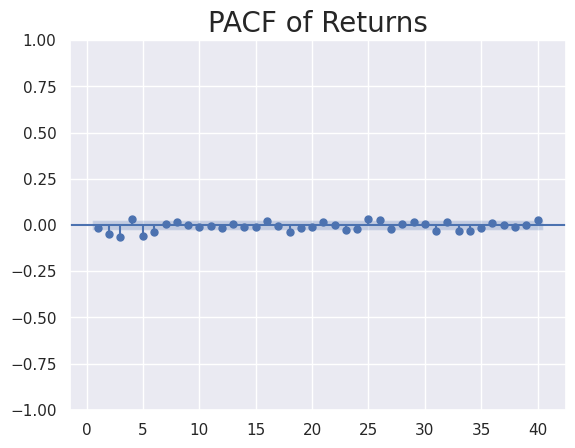

In [ ]:
sgt.plot_pacf(df_comp.returns[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

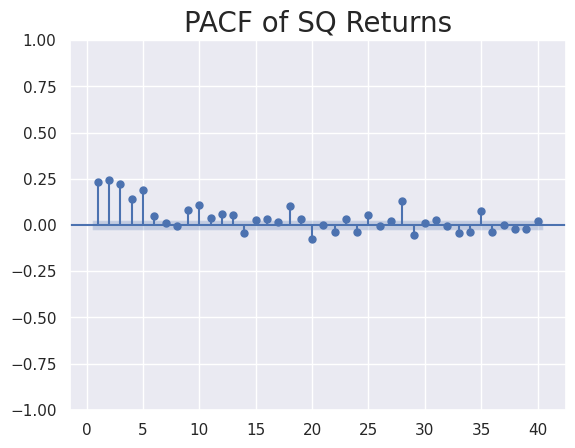

In [ ]:
sgt.plot_pacf(df_comp.sq_returns[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF of SQ Returns", size = 20)
plt.show()

There tend to be short term trends in variance:



Clustering








High variation ----- High variation









Low variation ------ Low variation

ARCH(1)

In [ ]:

!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 41.0 MB/s eta 0:00:00


In [ ]:


from arch import arch_model

In [ ]:
model_arch_1 = arch_model(df_comp.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13095358228.925074
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3316272663.839606
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8471.10851526324
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8478.252806125416
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8418.145534541141
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8503.158736023322
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8418.153230340275
Iteration:      8,   Func. Count:     53,   Neg. LLF: 8417.890567700728
Iteration:      9,   Func. Count:     59,   Neg. LLF: 8410.647245577844
Iteration:     10,   Func. Count:     64,   Neg. LLF: 8410.646877977731
Iteration:     11,   Func. Count:     69,   Neg. LLF: 8410.646871498735
Iteration:     12,   Func. Count:     73,   Neg. LLF: 8410.646871497003
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8410.646871498735
            Iterations: 12
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16829.3
Method:            Maximum Likelihood   BIC:                           16856.3
                                        No. Observations:                 6276
Date:                Wed, Jul 19 2023   Df Residuals:                     6275
Time:                        16:53:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.030e-02      4.103  4.081e-05 [2.206e-02,6.243e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.264e-03      3.810  1.391e-04 [6.037e-03,1.883e-02]
alpha[1]       0.0880  1.135e-02      7.749  9.242e-15   [6.571e-02,  0.110]
beta[1]        0.9018  1.279e-02     70.518      0.000     [  0.877,  0.927]
============================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df_comp.returns[1:])
results_arch_2 = model_arch_2.fit()
results_arch_2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13095358228.925074
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3316272663.839606
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8471.10851526324
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8478.252806125416
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8418.145534541141
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8503.158736023322
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8418.153230340275
Iteration:      8,   Func. Count:     53,   Neg. LLF: 8417.890567700728
Iteration:      9,   Func. Count:     59,   Neg. LLF: 8410.647245577844
Iteration:     10,   Func. Count:     64,   Neg. LLF: 8410.646877977731
Iteration:     11,   Func. Count:     69,   Neg. LLF: 8410.646871498735
Iteration:     12,   Func. Count:     73,   Neg. LLF: 8410.646871497003
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8410.646871498735
            Iterations: 12
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16829.3
Method:            Maximum Likelihood   BIC:                           16856.3
                                        No. Observations:                 6276
Date:                Wed, Jul 19 2023   Df Residuals:                     6275
Time:                        16:53:44   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.030e-02      4.103  4.081e-05 [2.206e-02,6.243e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.264e-03      3.810  1.391e-04 [6.037e-03,1.883e-02]
alpha[1]       0.0880  1.135e-02      7.749  9.242e-15   [6.571e-02,  0.110]
beta[1]        0.9018  1.279e-02     70.518      0.000     [  0.877,  0.927]
============================================================================

Covariance estimator: robust
"""

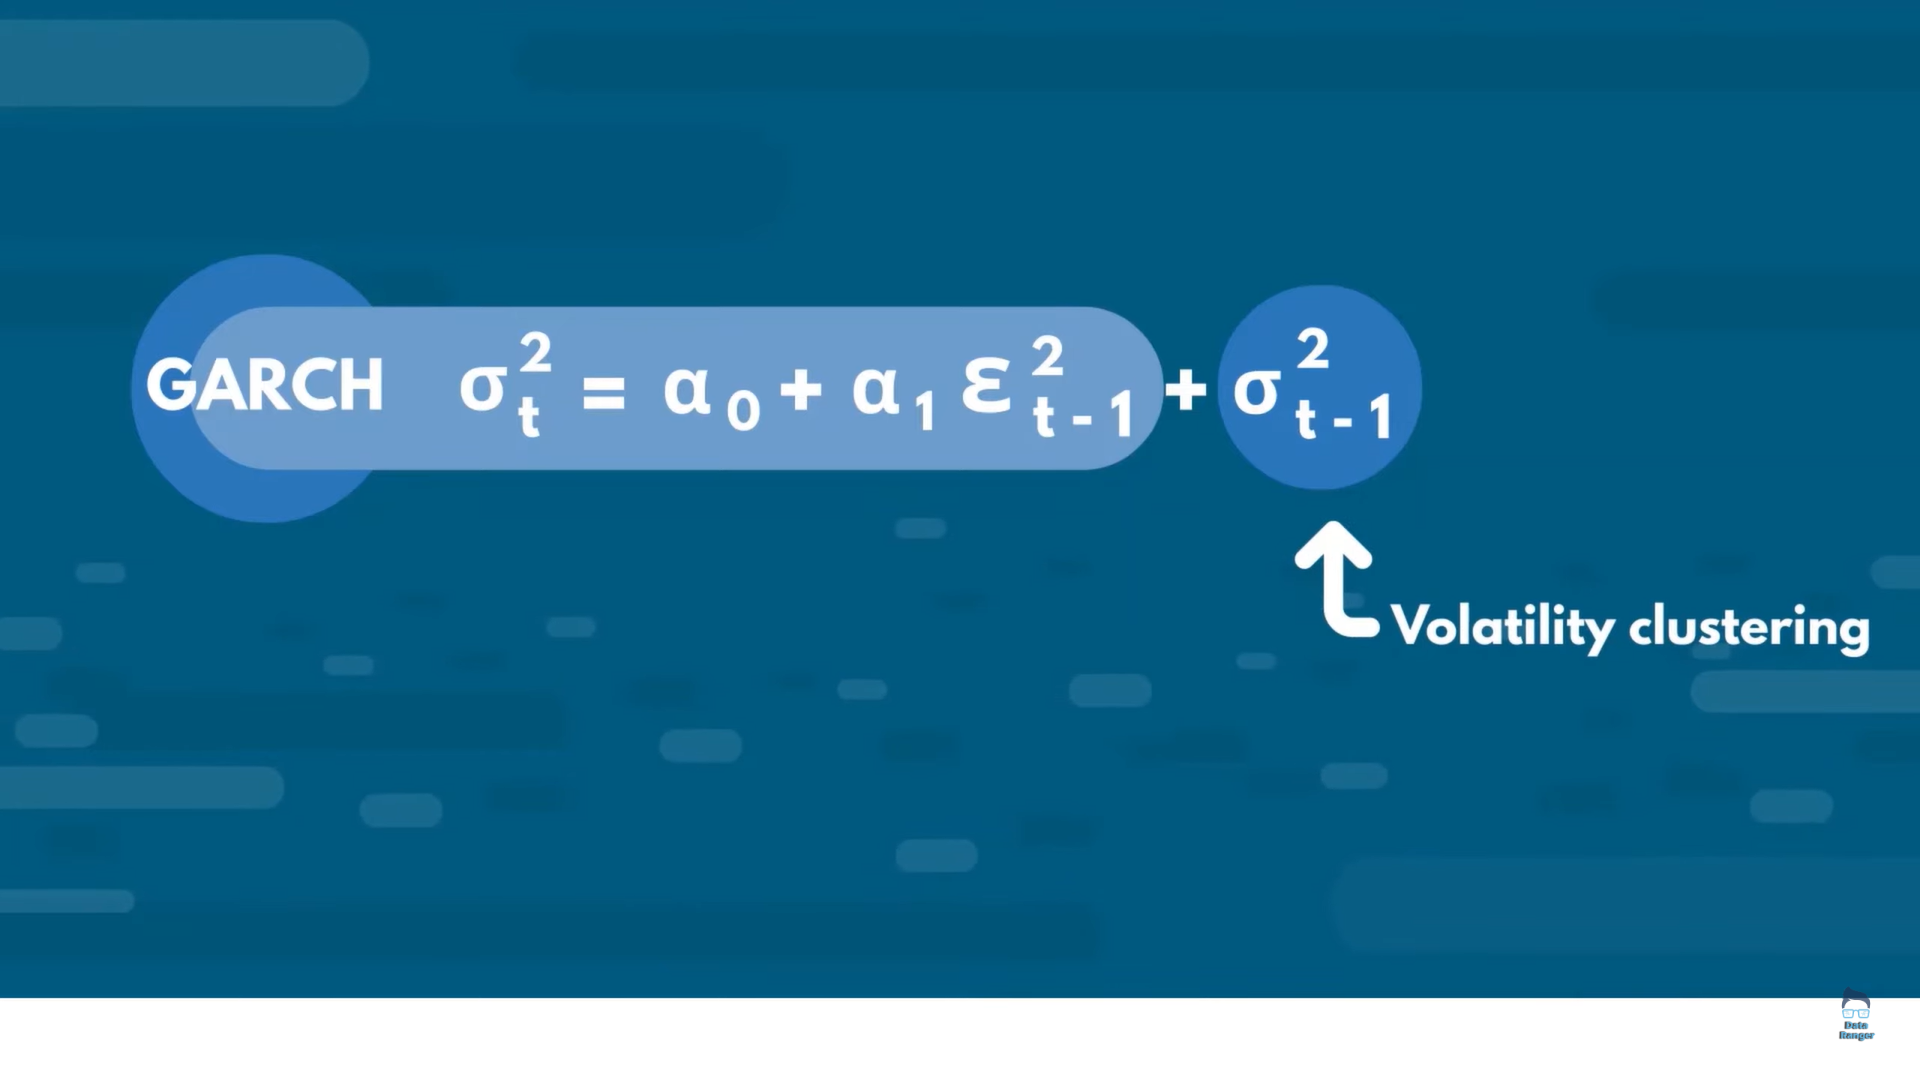

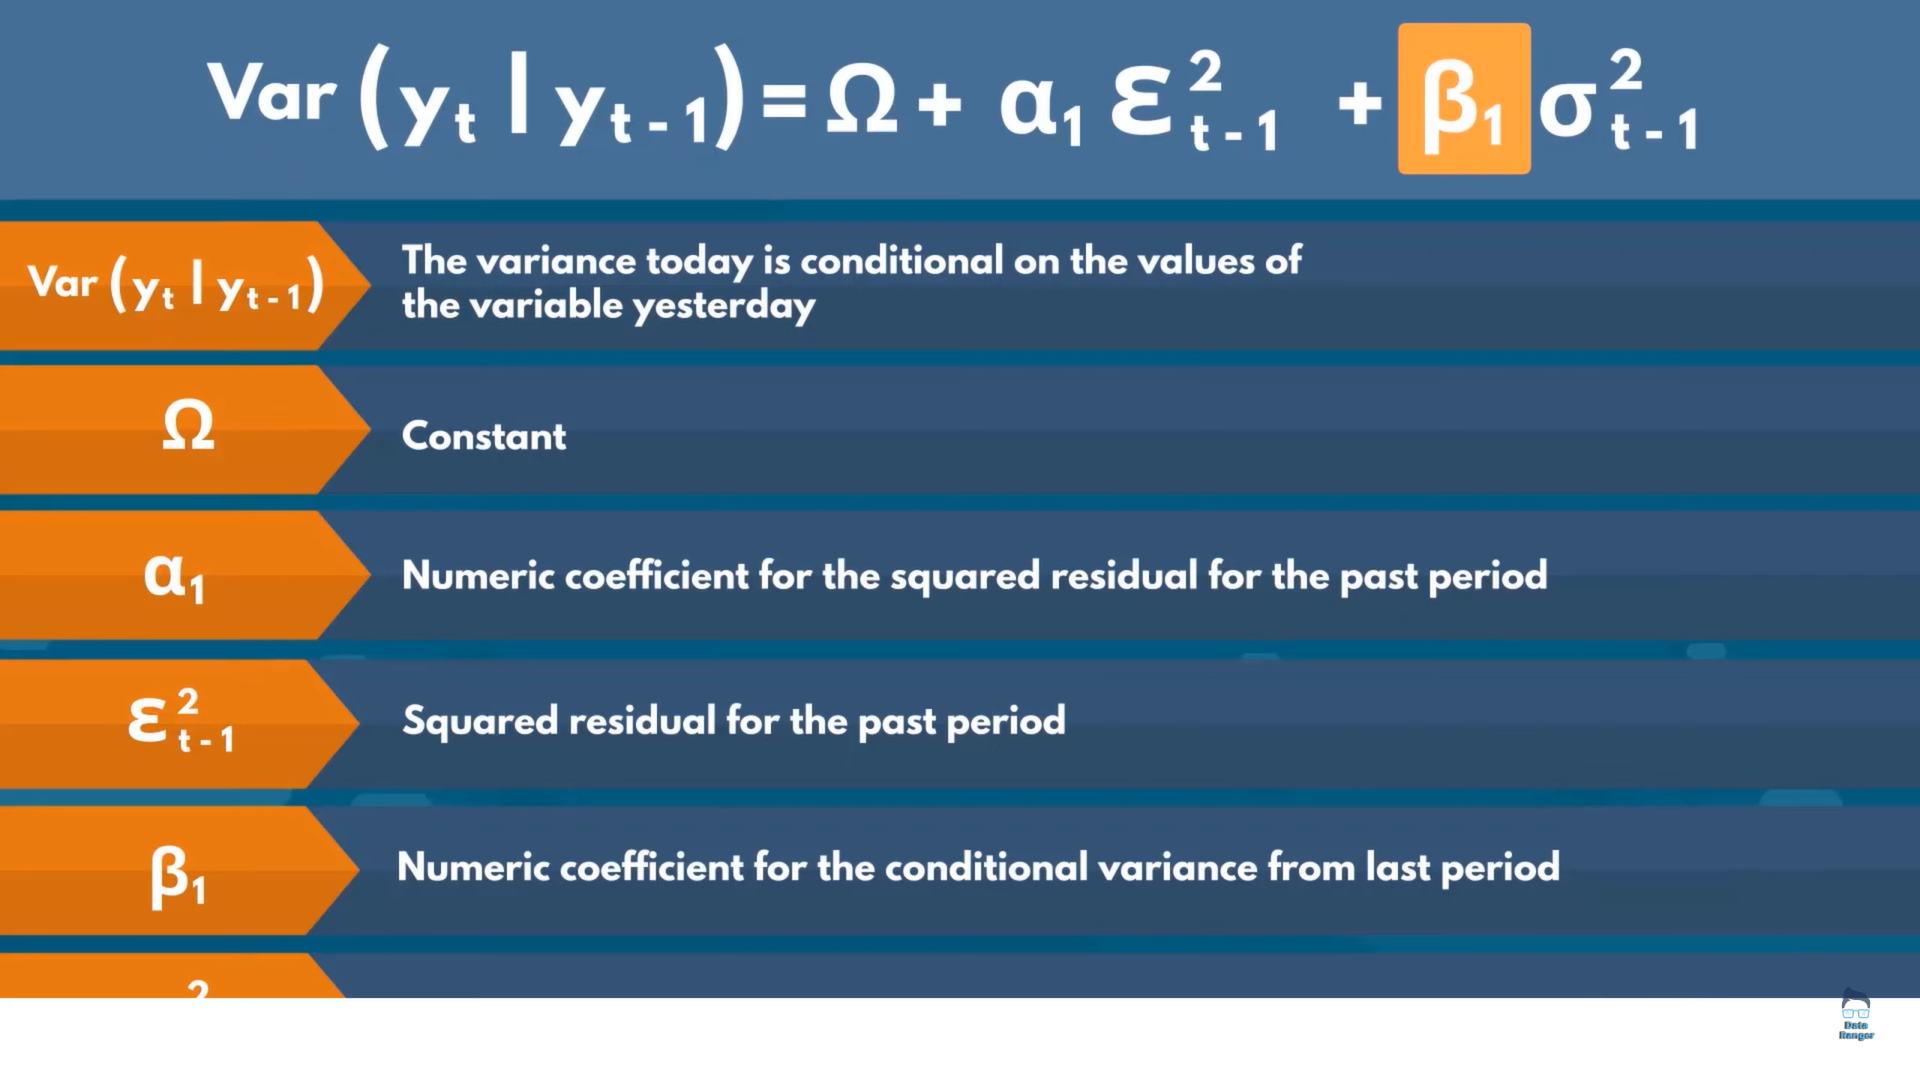

Garch model is similar to ARMA

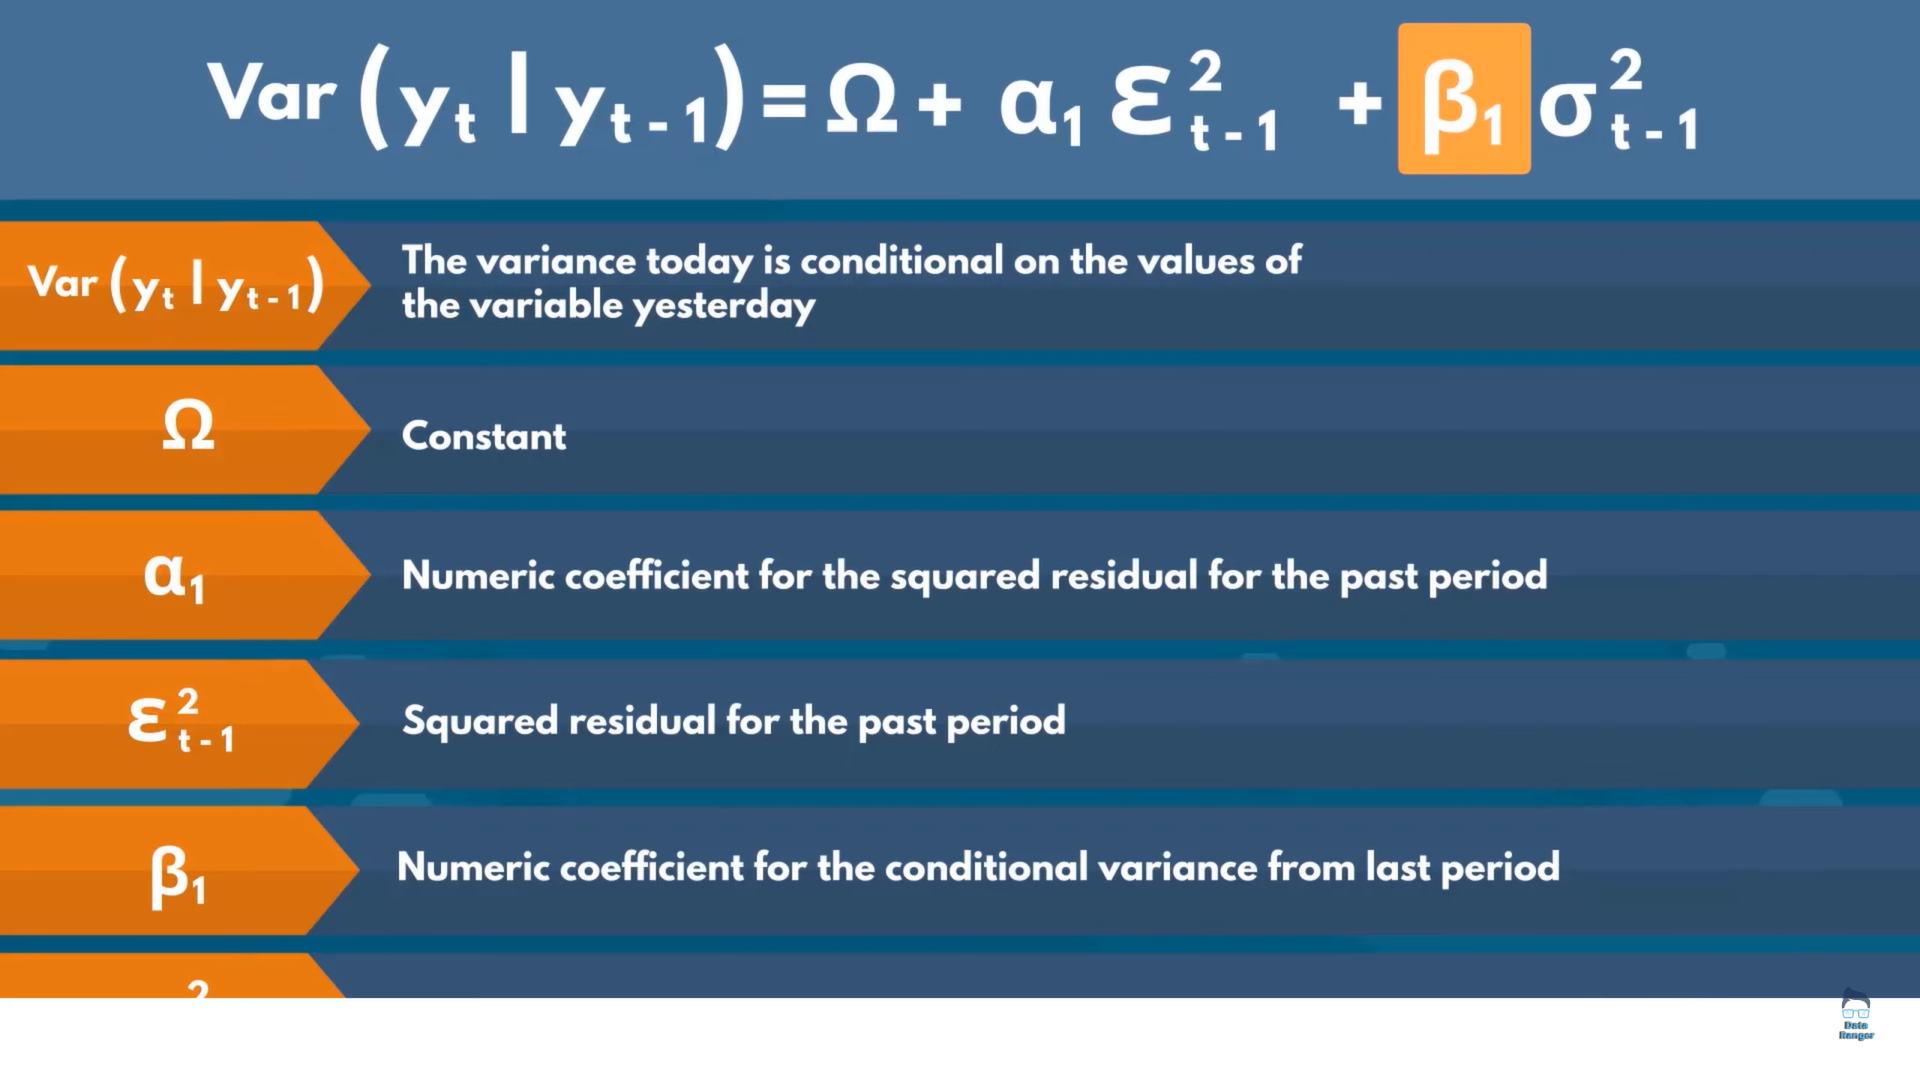

Garch Component is similar to AR component












ARCH Component is similar to MA Component

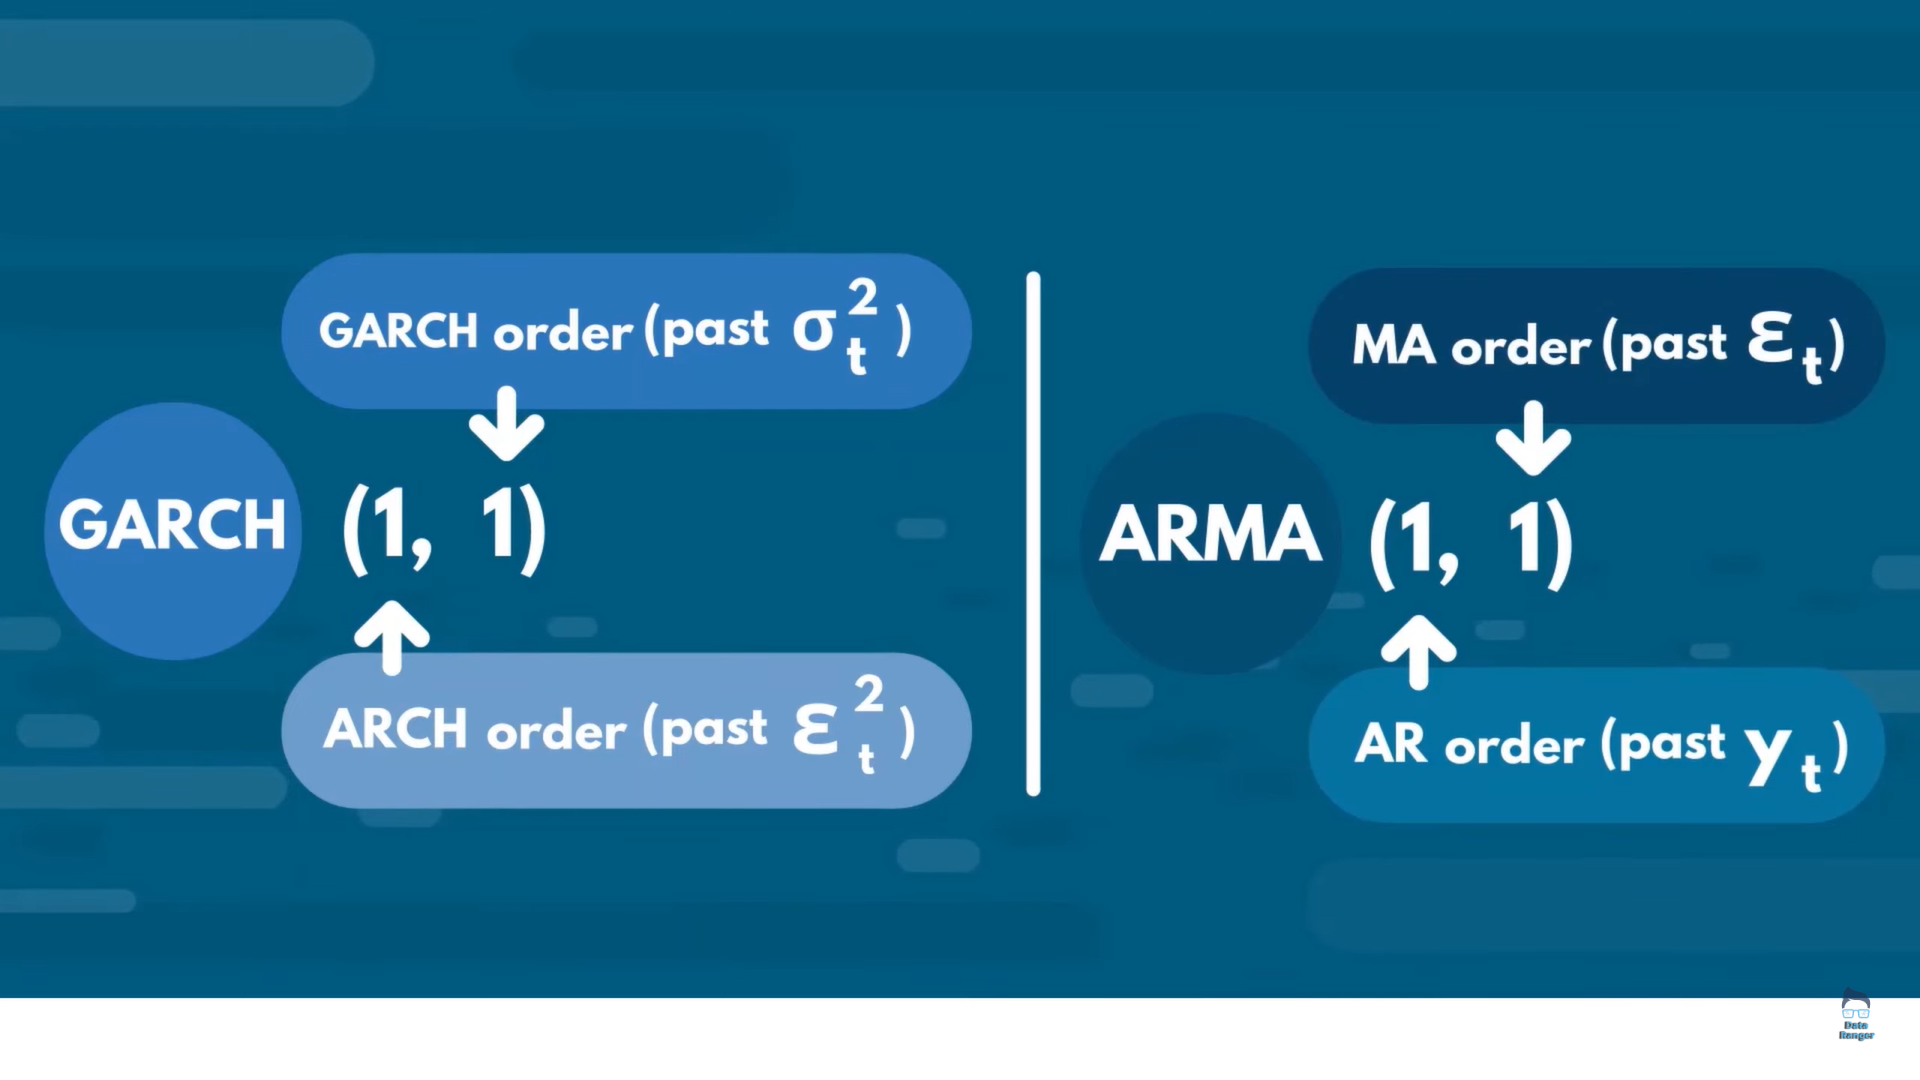

GARCH MOdel

In [ ]:
model_garch_1 = arch_model(df_comp.returns[1:])
results_garch_1 = model_garch_1.fit()
results_garch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13095358228.925074
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3316272663.839606
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8471.10851526324
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8478.252806125416
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8418.145534541141
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8503.158736023322
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8418.153230340275
Iteration:      8,   Func. Count:     53,   Neg. LLF: 8417.890567700728
Iteration:      9,   Func. Count:     59,   Neg. LLF: 8410.647245577844
Iteration:     10,   Func. Count:     64,   Neg. LLF: 8410.646877977731
Iteration:     11,   Func. Count:     69,   Neg. LLF: 8410.646871498735
Iteration:     12,   Func. Count:     73,   Neg. LLF: 8410.646871497003
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8410.646871498735
            Iterations: 12
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16829.3
Method:            Maximum Likelihood   BIC:                           16856.3
                                        No. Observations:                 6276
Date:                Wed, Jul 19 2023   Df Residuals:                     6275
Time:                        17:08:39   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.030e-02      4.103  4.081e-05 [2.206e-02,6.243e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.264e-03      3.810  1.391e-04 [6.037e-03,1.883e-02]
alpha[1]       0.0880  1.135e-02      7.749  9.242e-15   [6.571e-02,  0.110]
beta[1]        0.9018  1.279e-02     70.518      0.000     [  0.877,  0.927]
============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2 = arch_model(df_comp.returns[1:], mean = "constant", vol = "GARCH", p = 1 , q= 2)
results_garch_2 = model_garch_2.fit(update_freq = 5)
results_garch_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 8420.600710881872
Iteration:     10,   Func. Count:     73,   Neg. LLF: 8410.652593281535
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8410.646871423865
            Iterations: 14
            Function evaluations: 96
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16831.3
Method:            Maximum Likelihood   BIC:                           16865.0
                                        No. Observations:                 6276
Date:                Wed, Jul 19 2023   Df Residuals:                     6275
Time:                        17:11:18   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.029e-02      4.107  4.012e-05 [2.209e-02,6.241e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.126e-03      3.977  6.967e-05 [6.307e-03,1.856e-02]
alpha[1]       0.0880  1.354e-02      6.498  8.145e-11   [6.142e-02,  0.114]
beta[1]        0.9018      0.202      4.459  8.250e-06     [  0.505,  1.298]
beta[2]        0.0000      0.193      0.000      1.000     [ -0.378,  0.378]
============================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2 = arch_model(df_comp.returns[1:], mean = "constant", vol = "GARCH", p = 1 , q= 3)
results_garch_2 = model_garch_2.fit(update_freq = 5)
results_garch_2.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 8516.522032051613
Iteration:     10,   Func. Count:     86,   Neg. LLF: 8448.459889607573
Iteration:     15,   Func. Count:    122,   Neg. LLF: 8410.646871427405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8410.646871427405
            Iterations: 16
            Function evaluations: 128
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.65
Distribution:                  Normal   AIC:                           16833.3
Method:            Maximum Likelihood   BIC:                           16873.8
                                        No. Observations:                 6276
Date:                Wed, Jul 19 2023   Df Residuals:                     6275
Time:                        17:12:17   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.373e-02      3.078  2.086e-03 [1.534e-02,6.915e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0124  2.910e-02      0.427      0.669 [-4.460e-02,6.947e-02]
alpha[1]       0.0880      0.213      0.413      0.679      [ -0.329,  0.505]
beta[1]        0.9018      6.328      0.143      0.887      [-11.500, 13.304]
beta[2]        0.0000      9.680      0.000      1.000      [-18.972, 18.972]
beta[3]        0.0000      3.588      0.000      1.000      [ -7.032,  7.032]
=============================================================================

Covariance estimator: robust
"""

This proves GARCH(1,1) is the best model for measuring volatility of returns